# A deep dive into 'Forests'

Please check associated blog post here - 

In [212]:
## Random forest implementation to
## classify BRCA cases as Malignant (1) or Benign (0)

## https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [215]:
## read data
df_raw = pd.read_csv('data.csv', index_col = 'id')
df_raw.head().transpose()

id                       842302    842517    84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

In [216]:
## id is patient ID
## remove 'Unnamed: 32'

df_raw = df_raw.drop('Unnamed: 32', axis=1)

In [25]:
## split into training and test sets
train_df, test_df = train_test_split(df_raw, test_size=0.25)

In [26]:
len(train_df)

426

In [27]:
len(test_df)

143

In [30]:
test_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
9010259          B        13.05         18.59           85.09      512.0   
8812816          B        13.65         13.16           87.88      568.9   
9112085          B        13.38         30.72           86.34      557.2   
88206102         M        20.51         27.81          134.40     1319.0   
904971           B        10.94         18.59           70.39      370.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
9010259           0.10820           0.13040         0.09603   
8812816           0.09646           0.08711         0.03888   
9112085           0.09245           0.07426         0.02819   
88206102          0.09159           0.10740         0.15540   
904971            0.10040           0.07460         0.04944   

          concave points_mean  symmetry_mean           ...             \
id                                                     ...              
9010259               0.05603         0.2035           ...              
8812816               0.02563         0.1360           ...              
9112085               0.03264         0.1375           ...              
88206102              0.08340         0.1448           ...              
904971                0.02932         0.1486           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
9010259          14.19          24.85            94.22       591.2   
8812816          15.34          16.35            99.71       706.2   
9112085          15.05          41.61            96.69       705.6   
88206102         24.47          37.38           162.70      1872.0   
904971           12.40          25.58            82.76       472.4   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
9010259             0.1343             0.2658          0.25730   
8812816             0.1311             0.2474          0.17590   
9112085             0.1172             0.1421          0.07003   
88206102            0.1223             0.2761          0.41460   
904971              0.1363             0.1644          0.14120   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
9010259                0.12580          0.3113                  0.08317  
8812816                0.08056          0.2380                  0.08718  
9112085                0.07763          0.2196                  0.07675  
88206102               0.15630          0.2437                  0.08328  
904971                 0.07887          0.2251                  0.07732  

[5 rows x 31 columns]

In [31]:
test_df.diagnosis.value_counts()

B    95
M    48
Name: diagnosis, dtype: int64

In [32]:
train_df.diagnosis.value_counts()

B    262
M    164
Name: diagnosis, dtype: int64

In [33]:
df_raw.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [37]:
## binarize 'diagnosis'
outcome_label = np.where(train_df['diagnosis'] == 'M', 1, 0)
outcome_label

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [81]:
train_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                       
857793         M        14.71         21.59           95.55      656.9   
855625         M        19.07         24.81          128.30     1104.0   
905520         B        11.04         16.83           70.92      373.2   
87163          M        13.43         19.63           85.84      565.4   
915664         B        14.81         14.70           94.66      680.7   

        smoothness_mean  compactness_mean  concavity_mean  \
id                                                          
857793          0.11370           0.13650         0.12930   
855625          0.09081           0.21900         0.21070   
905520          0.10770           0.07804         0.03046   
87163           0.09048           0.06288         0.05858   
915664          0.08472           0.05016         0.03416   

        concave points_mean  symmetry_mean           ...             \
id                                                   ...              
857793              0.08123         0.2027           ...              
855625              0.09961         0.2310           ...              
905520              0.02480         0.1714           ...              
87163               0.03438         0.1598           ...              
915664              0.02541         0.1659           ...              

        radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                 
857793         17.87          30.70           115.70       985.5   
855625         24.09          33.17           177.40      1651.0   
905520         12.41          26.44            79.93       471.4   
87163          17.98          29.87           116.60       993.6   
915664         15.61          17.58           101.70       760.2   

        smoothness_worst  compactness_worst  concavity_worst  \
id                                                             
857793            0.1368             0.4290           0.3587   
855625            0.1247             0.7444           0.7242   
905520            0.1369             0.1482           0.1067   
87163             0.1401             0.1546           0.2644   
915664            0.1139             0.1011           0.1101   

        concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                     
857793               0.18340          0.3698                  0.10940  
855625               0.24930          0.4670                  0.10380  
905520               0.07431          0.2998                  0.07881  
87163                0.11600          0.2884                  0.07371  
915664               0.07955          0.2334                  0.06142  

[5 rows x 31 columns]

In [39]:
## get features to be used = remove 'diagnosis' column
features = train_df.columns[1:]
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [177]:
## implement RF
brca_clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
brca_clf.fit(train_df[features], outcome_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [178]:
brca_clf.predict(test_df[features])

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [179]:
test_labels = test_df["diagnosis"].unique()

In [180]:
## map labels to ooutcomes from the model
test_predictions = test_labels[brca_clf.predict(test_df[features])]
test_predictions[0:10]

array(['B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [181]:
## ground truth from the test_df and predictions

conf_matrix = pd.crosstab(test_df["diagnosis"], test_predictions, rownames=["Ground Truth"], colnames=["Model Predictions"])


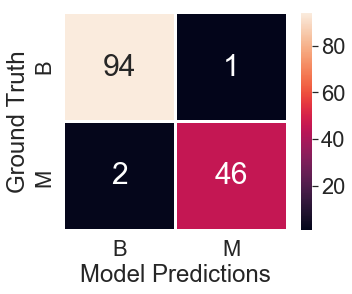

In [213]:
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True, linecolor='white', linewidths=1.5, annot_kws={"size": 30})

In [183]:
## plot feature importance scores
feat_importances = pd.Series(brca_clf.feature_importances_, index=train_df.columns[1:])
feat_importances.head()

radius_mean        0.023095
texture_mean       0.019641
perimeter_mean     0.059293
area_mean          0.032830
smoothness_mean    0.007325
dtype: float64

Text(0.5, 0, 'importance score')

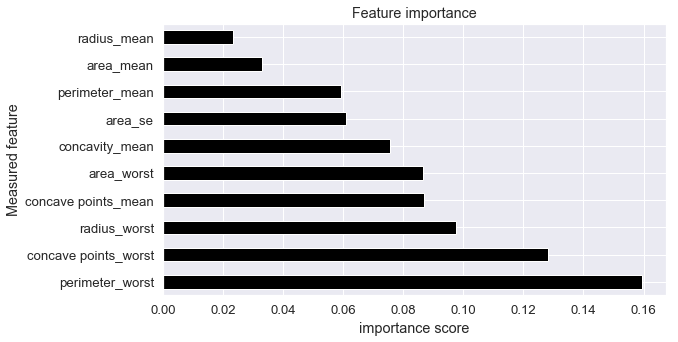

In [198]:
plt.figure(figsize = (9,5))
feat_importances.nlargest(10).plot(kind='barh', color='black')
plt.title("Feature importance")
plt.ylabel("Measured feature")
plt.xlabel("importance score")

In [185]:
## plot box plots for M and B for first 5 features
## see how much they differ
test_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
9010259          B        13.05         18.59           85.09      512.0   
8812816          B        13.65         13.16           87.88      568.9   
9112085          B        13.38         30.72           86.34      557.2   
88206102         M        20.51         27.81          134.40     1319.0   
904971           B        10.94         18.59           70.39      370.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
9010259           0.10820           0.13040         0.09603   
8812816           0.09646           0.08711         0.03888   
9112085           0.09245           0.07426         0.02819   
88206102          0.09159           0.10740         0.15540   
904971            0.10040           0.07460         0.04944   

          concave points_mean  symmetry_mean           ...             \
id                                                     ...              
9010259               0.05603         0.2035           ...              
8812816               0.02563         0.1360           ...              
9112085               0.03264         0.1375           ...              
88206102              0.08340         0.1448           ...              
904971                0.02932         0.1486           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
9010259          14.19          24.85            94.22       591.2   
8812816          15.34          16.35            99.71       706.2   
9112085          15.05          41.61            96.69       705.6   
88206102         24.47          37.38           162.70      1872.0   
904971           12.40          25.58            82.76       472.4   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
9010259             0.1343             0.2658          0.25730   
8812816             0.1311             0.2474          0.17590   
9112085             0.1172             0.1421          0.07003   
88206102            0.1223             0.2761          0.41460   
904971              0.1363             0.1644          0.14120   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
9010259                0.12580          0.3113                  0.08317  
8812816                0.08056          0.2380                  0.08718  
9112085                0.07763          0.2196                  0.07675  
88206102               0.15630          0.2437                  0.08328  
904971                 0.07887          0.2251                  0.07732  

[5 rows x 31 columns]

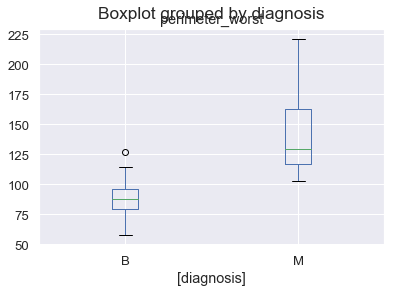

In [189]:
test_df[["diagnosis", "perimeter_worst"]].boxplot(by = "diagnosis")

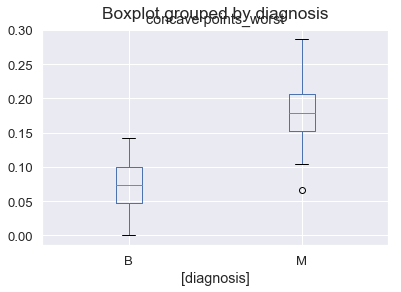

In [190]:
test_df[["diagnosis", "concave points_worst"]].boxplot(by = "diagnosis")

In [208]:
## plot decision trees
## help: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

from sklearn.tree import export_graphviz

train_labels = train_df["diagnosis"].unique()

## randomly chose tree-9 to plot
estimator = brca_clf.estimators_[25]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = train_labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

In [209]:
from IPython.display import Image
Image(filename = 'tree.png')